
Script to Explore SVMs

Simple script to explore SVM training with varying C

Example adapted from scikit_learn documentation by Eric Eaton, 2014


Training the SVM

Testing the SVM


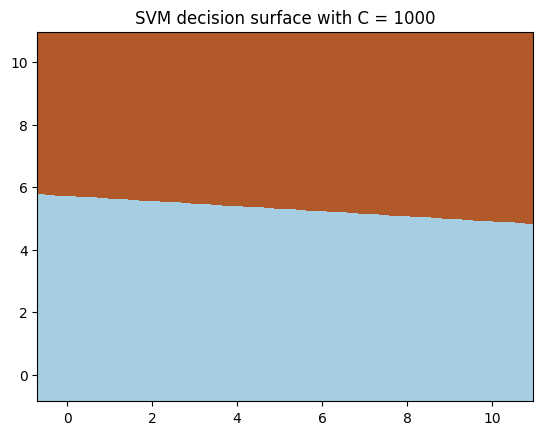

In [1]:
"""
======================
Script to Explore SVMs
======================

Simple script to explore SVM training with varying C

Example adapted from scikit_learn documentation by Eric Eaton, 2014

"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# load the data
filename = 'data/svmData.dat'
allData = np.loadtxt(filename, delimiter=',')

X = allData[:, :-1]
Y = allData[:, -1]

C = 1000

# train the SVM
print("Training the SVM")
clf = svm.SVC(C=C, kernel='linear')
clf.fit(X, Y)

print("")
print("Testing the SVM")

h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.title('SVM decision surface with C = ' + str(C))
plt.axis('tight')
plt.show()


In [22]:
"""
=======================================
Test SVM with custom polynomial kernels
=======================================

Author: Eric Eaton, 2014

Adapted from scikit_learn documentation.

"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from svmKernels import myPolynomialKernel
from svmKernels import _polyDegree

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features
Y = iris.target

print ("Training the SVMs...")

C = 1.0  # value of C for the SVMs

# create an instance of SVM with the custom kernel and train it
myModel = svm.SVC(C = C, kernel=myPolynomialKernel)
myModel.fit(X, Y)

# create an instance of SVM with build in poly kernel and train it
model = svm.SVC(C = C, kernel='poly', degree=_polyDegree, coef0=1, gamma=1)
model.fit(X, Y)

print ("")
print ("Testing the SVMs...")

h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# get predictions for both my model and true model
myPredictions = myModel.predict(np.c_[xx.ravel(), yy.ravel()])
myPredictions = myPredictions.reshape(xx.shape)

predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])
predictions = predictions.reshape(xx.shape)

# plot my results
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, myPredictions, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired) # Plot the training points
plt.title("SVM with My Custom Polynomial Kernel (degree = "+str(_polyDegree) + ", C = "+str(C)+")")
plt.axis('tight')

# plot built-in results
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, predictions, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired) # Plot the training points
plt.title('SVM with Equivalent Scikit_learn Poly Kernel for Comparison')
plt.axis('tight')

plt.show()



Test SVM with custom polynomial kernels

Author: Eric Eaton, 2014

Adapted from scikit_learn documentation.


Training the SVMs...


IndexError: tuple index out of range

In [35]:
"""
=====================================
Test SVM with custom Gaussian kernels
=====================================

Author: Eric Eaton, 2014

Adapted from scikit_learn documentation.

"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from svmKernels import myGaussianKernel
from svmKernels import _gaussSigma

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features
Y = iris.target

print("Training the SVMs...")

C = 1.0  # value of C for the SVMs

# create an instance of SVM with the custom kernel and train it
myModel = svm.SVC(C=C, kernel=myGaussianKernel)
myModel.fit(X, Y)

# create an instance of SVM with build in RBF kernel and train it
equivalentGamma = 1.0 / (2 * _gaussSigma ** 2)
model = svm.SVC(C=C, kernel='rbf', gamma=equivalentGamma)
model.fit(X, Y)

print("")
print("Testing the SVMs...")

h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# get predictions for both my model and true model
myPredictions = myModel.predict(np.c_[xx.ravel(), yy.ravel()])
myPredictions = myPredictions.reshape(xx.shape)

predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])
predictions = predictions.reshape(xx.shape)

# plot my results
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, myPredictions, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)  # Plot the training points
plt.title("SVM with My Custom Gaussian Kernel (sigma = " + str(_gaussSigma) + ", C = " + str(C) + ")")
plt.axis('tight')

# plot built-in results
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, predictions, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)  # Plot the training points
plt.title('SVM with Equivalent Scikit_learn RBF Kernel for Comparison')
plt.axis('tight')

plt.show()



Test SVM with custom Gaussian kernels

Author: Eric Eaton, 2014

Adapted from scikit_learn documentation.


Training the SVMs...


IndexError: tuple index out of range

Optimal C: 60
Optimal σ: 10.0
Estimated Accuracy: 1.0


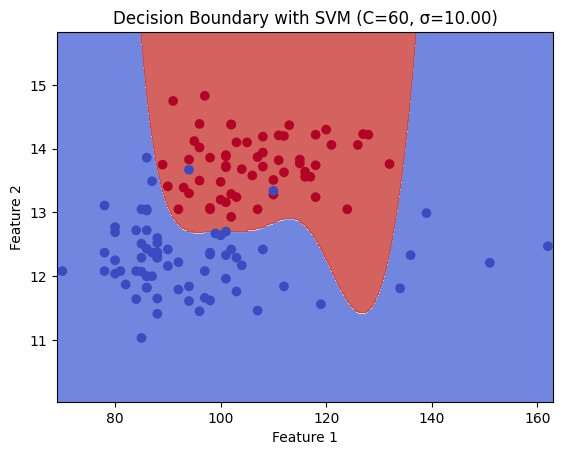

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm

# Step 1: Load the Data
# Replace 'your_data_path' with the actual path to your dataset
data = np.genfromtxt('../hw2_skeleton/data/svmTuningData.dat', delimiter=',', skip_header=1)  # Specify the delimiter

# Assume the last column is the target variable
X = data[:, :-1]
y = data[:, -1]

# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the Parameter Grid
C_values = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60, 100]
sigma_values = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60, 100]

param_grid = {'C': C_values, 'gamma': 1 / (2 * np.array(sigma_values) ** 2)}

# Step 4: Grid Search
svc = svm.SVC(kernel='rbf')
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Step 5: Fit and Evaluate
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)

# Step 6: Report Results
print("Optimal C:", best_model.C)
print("Optimal σ:", 1 / np.sqrt(2 * best_model.gamma))
print("Estimated Accuracy:", accuracy)

# Plotting the decision boundary
h = .02  # Step size in the mesh

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

plt.title("Decision Boundary with SVM (C={}, σ={:.2f})".format(best_model.C, 1 / np.sqrt(2 * best_model.gamma)))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
